# Tree

This repository provides code for two visualizations related to decision trees:

1. Decision Tree Visualization

2. Scatter Plot with Decision Boundary
## Data Source

The data used for these visualizations is sourced from Kaggle. The Melbourne Housing Snapshot dataset can be accessed [here](https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot).

2023.07.15 1911i  
just back from a 3hour nap...  
lets get init  

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [18]:
import pandas as pd
try:
    melb_data = pd.read_csv("melb_data.csv")
    print("Wellcome Home")
except:
    melb_data = pd.read_csv("/kaggle/input/melbourne-housing-snapshot/melb_data.csv")
    print("Wellcome to Kaggle")
print(melb_data.head(1))

       Suburb       Address  Rooms Type      Price Method SellerG       Date  \
0  Abbotsford  85 Turner St      2    h  1480000.0      S  Biggin  3/12/2016   

   Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
0       2.5    3067.0  ...       1.0  1.0     202.0           NaN        NaN   

   CouncilArea Lattitude  Longtitude             Regionname Propertycount  
0        Yarra  -37.7996    144.9984  Northern Metropolitan        4019.0  

[1 rows x 21 columns]


# Nan

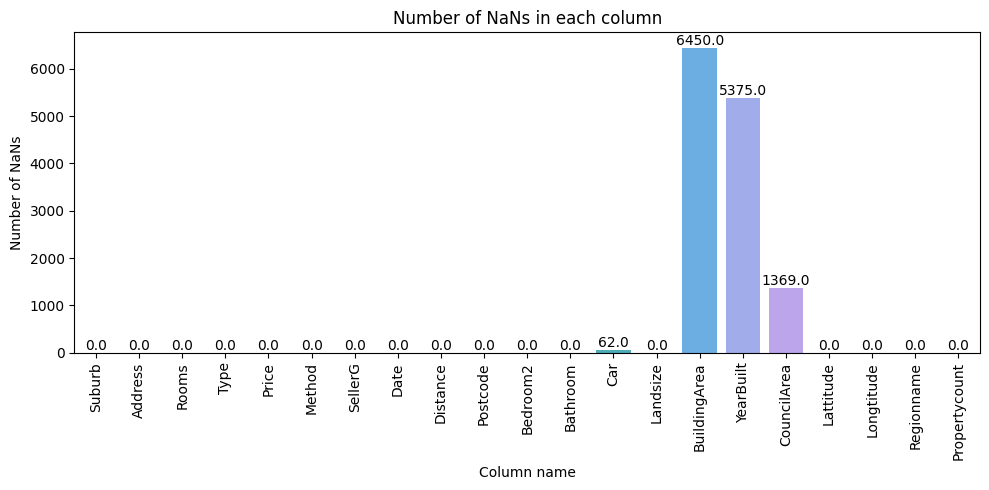

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

nan_in_cols = melb_data.isnull().sum()  # Count the NaNs in each column

plt.figure(figsize=(10,5))
bars = sns.barplot(x=nan_in_cols.index, y=nan_in_cols.values)

plt.title('Number of NaNs in each column')
plt.xlabel('Column name')
plt.ylabel('Number of NaNs')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Adding the text on top of each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + .5, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

So we will not use the labels that has nan data , [Car, BuildingArea,YearBuilt,CouncliArea]

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

xdata = melb_data[['Rooms','Type','Method','Distance','Bathroom','Landsize','YearBuilt','Propertycount']]

ydata = melb_data['Price']

In [24]:
le = LabelEncoder()
xdata_float = xdata.apply(le.fit_transform)
print(xdata_float.head(2))
print(ydata)

   Rooms  Type  Method  Distance  Bathroom  Landsize  YearBuilt  Propertycount
0      1     0       1        12         1       175        144            157
1      1     0       1        12         1       129         29            157
0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13580, dtype: float64


In [31]:
#tree_reg = DecisionTreeClassifier(max_depth=2)
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(xdata_float,ydata)

DecisionTreeRegressor(max_depth=2)

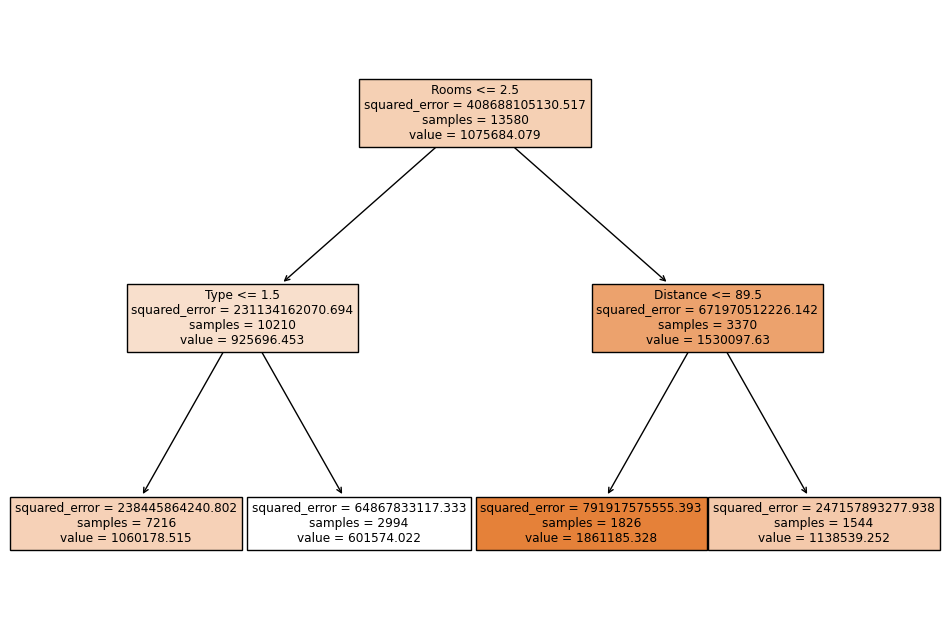

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Visualize the decision tree
fig = plt.figure(figsize=(12, 8))
_ = sklearn.tree.plot_tree(tree_reg, feature_names=xdata_float.columns.tolist(), filled=True)
plt.show()

/Users/owo/anaconda3/envs/torchenv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


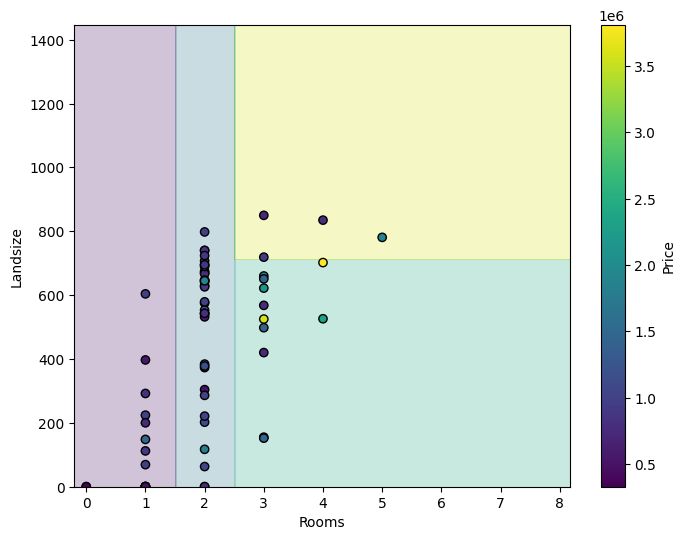

In [50]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

## This shows only a random few of the data (because it overlaps too much)

posibility = 0.005 #

# Select only two features
xdata = melb_data[['Rooms','Landsize']]
ydata = melb_data['Price']

# Apply label encoder
le = LabelEncoder()
xdata_float = xdata.apply(le.fit_transform)

# Train the model
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(xdata_float, ydata)

def plot_decision_boundary(clf, X, Y, cmap='viridis'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    contour = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    
    # Randomly sample 10% of the data points to plot
    indices = np.random.choice(X.shape[0], size=int(posibility * X.shape[0]), replace=False)
    X_sample = X[indices, :]
    Y_sample = Y.iloc[indices]

    scatter = plt.scatter(X_sample[:,0], X_sample[:,1], c=Y_sample, cmap=cmap, edgecolors='k')

    # Add x and y labels
    plt.xlabel('Rooms')
    plt.ylabel('Landsize')

    # Add a colorbar with a label
    cbar = plt.colorbar(scatter)
    cbar.set_label('Price')

plot_decision_boundary(tree_reg, xdata_float.values, ydata)